# Fast Food (Burger King & Subway) Data Analysis

### By Nathania Yuliani (VENT data)

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing</a></li>  
<li><a href="#conclusion">Conclusion</a></li> 
</ul>

<a id='intro'></a>
## Introduction

The goal of this project is to analyze and visualize the Fast Food dataset to gain insights on the fast food business in the US, particularly Burger King and Subway.

<a id='gather'></a>
## Gathering Data

We manually downloaded the dataset from Kaggle (https://www.kaggle.com/datafiniti/fast-food-restaurants) and uploaded to our Github page. <br /> 
<br />
The dataset contains a list of 10,000 fast food businesses from Datafiniti's Business Database updated between April 2018 and June 2018. The dataset includes the restaurant's address, city, latitude and longitude coordinates, name, and more.

In [37]:
#Import all necessary packages
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [38]:
#Import csv file into notebook
url='https://raw.githubusercontent.com/ventdata/Fast-Food/master/fast-food-restaurants/Datafiniti_Fast_Food_Restaurants.csv'
data = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
data.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [39]:
#Import state data
state_data = pd.read_csv('US_state_data.csv')
state_data.head()

,State,Square Miles (Land Area),Population
0,Alabama,50750,"4,849,000 (23rd)"
1,Alaska,570641,"737,000 (49th)"
2,Arizona,113642,"6,731,000 (15th)"
3,Arkansas,52075,"2,966,000 (33rd)"
4,California,155973,"38,803,000 (1st)"


This state data needs to be cleaned in these 2 ways:
1. State column needs to be changed to abbreviations (to match our fast food data)
2. Population rank needs to be removed

<a id='assess'></a>
## Assessing Data

In [40]:
#Check which Fast Food restaurants have the most outlets in the US
data['name'].value_counts()

McDonald's                                       1898
Taco Bell                                        1032
Burger King                                       833
Subway                                            776
Arby's                                            663
Wendy's                                           628
Jack in the Box                                   330
Pizza Hut                                         230
Dairy Queen                                       218
Domino's Pizza                                    215
Chick-fil-A                                       206
KFC                                               162
SONIC Drive In                                    125
Jimmy John's                                      119
Carl's Jr.                                        112
Hardee's                                           99
Krystal                                            82
Panera Bread                                       76
Dunkin' Donuts              

We decided to do our analyses on the Top 6 Fast Food restaurants based on count: McDonald's, Taco Bell, Burger King, Subway, Arby's, and Wendy's. <br />

Furthermore, we split our tasks between our 3 team members and each took 2 restaurants. In this notebook, I will do the analyses on Burger King and Subway.

<a id='clean'></a>
## Cleaning Data

I will create 2 new dataframes, 1 just for Burger King and 1 for Subway.

In [41]:
#Create 2 new dataframes
burger_king = data.query("name == 'Burger King'")
subway = data.query("name == 'Subway'")

In [42]:
#Check the new Burger King dataframe is correct
burger_king.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
6,AVwc81QgkufWRAb50vnI,2015-09-21T07:47:08Z,2018-06-26T02:59:43Z,13600 W McNichols Rd,Fast Food Restaurant,Detroit,US,us/mi/detroit/13600wmcnicholsrd/-2061630068,42.416819,-83.180444,Burger King,48235,MI,https://foursquare.com/v/burger-king/4bab7981f...,"http://bk.com,http://www.bk.com"
55,AV0aJ-e7-gnIPe8DVwr6,2017-07-06T23:06:49Z,2018-06-25T09:27:52Z,100 Business Loop 70 E,Fast Food Restaurants,Columbia,US,us/mo/columbia/100businessloop70e/-2061630068,38.964944,-92.336364,Burger King,65203,MO,https://www.allmenus.com/mo/columbia/190842-bu...,https://locations.bk.com/mo/columbia/100-east-...
65,AVwdNSSPkufWRAb53cQa,2016-03-28T05:51:17Z,2018-06-25T09:01:05Z,184 Endicott St,Fast food restaurants,Danvers,US,us/ma/danvers/184endicottst/-2061630068,42.547923,-70.942014,Burger King,01923,MA,https://www.allmenus.com/ma/danvers/197630-bur...,http://www.bk.com
70,AVwePo1-_7pvs4fzBS_K,2016-03-26T04:52:32Z,2018-06-25T09:00:55Z,2992 Jamacha Rd,Fast Food,El Cajon,US,us/ca/elcajon/2992jamachard/-2061630068,32.739923,-116.942156,Burger King,92019,CA,https://www.allmenus.com/ca/el-cajon/172181-bu...,"http://www.burgerking.com/,http://www.bk.com"
73,AVwdiPqNkufWRAb562Hr,2014-10-26T13:04:15Z,2018-06-25T09:00:55Z,822 N Johnson Ave,Fast food restaurants,El Cajon,US,us/ca/elcajon/822njohnsonave/-2061630068,32.805945,-116.971542,Burger King,92020,CA,https://foursquare.com/v/burger-king/4c0d16c33...,http://www.burgerking.com/


In [43]:
#Check the new Subway dataframe is correct
subway.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
332,AVwco-tJ_7pvs4fzxXPS,2015-11-07T12:18:17Z,2018-06-22T18:39:30Z,1211 Joe Frank Harris Pkwy SE,Fast Food Restaurants,Cartersville,US,us/ga/cartersville/1211joefrankharrispkwyse/-8...,34.203844,-84.809281,Subway,30120,GA,http://www.dexknows.com/business_profiles/subw...,"http://www.subway.com,http://subway.com"
333,AVweNAbLIN2L1WUf25Es,2016-03-21T01:39:40Z,2018-06-22T18:39:26Z,192 Lovvorn Ave,Fast Food Restaurants,Bowdon,US,us/ga/bowdon/192lovvornave/-891525969,33.538661,-85.251916,Subway,30108,GA,https://foursquare.com/v/subway/4e4decd9bd41b7...,http://www.subway.com
337,AVwclJMBIN2L1WUfmkGt,2015-10-19T23:00:39Z,2018-06-22T18:39:20Z,1637 Liberty Expy SE,Fast Food Restaurants,Albany,US,us/ga/albany/1637libertyexpyse/-891525969,31.499616,-84.115596,Subway,31705,GA,https://foursquare.com/v/subway/4be9b69361aca5...,"http://www.subway.com,http://subway.com"
338,AVwdIiF9ByjofQCxl1Pg,2016-03-21T01:38:26Z,2018-06-22T18:39:19Z,1103 N Westover Blvd,Fast Food Restaurant,Albany,US,us/ga/albany/1103nwestoverblvd/-891525969,31.620486,-84.220416,Subway,31707,GA,https://foursquare.com/v/subway/4ba7cadcf964a5...,http://api.citygridmedia.com/content/places/v2...
437,AV1gs5xPa4HuVbed7Pyp,2017-07-20T15:52:49Z,2018-06-22T18:34:57Z,1750 Rostraver Rd,Fast Food Restaurants,Belle Vernon,US,us/pa/bellevernon/1750rostraverrd/-891525969,40.174915,-79.806673,Subway,15012,PA,http://www.yellowbook.com/profile/subway_16322...,http://www.subway.com


In [44]:
#Change State column in state data to abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

state_data['state_abbrev'] = state_data['State'].map(us_state_abbrev)

In [45]:
#Check the result of abbreviating state name
state_data.head()

,State,Square Miles (Land Area),Population,state_abbrev
0,Alabama,50750,"4,849,000 (23rd)",AL
1,Alaska,570641,"737,000 (49th)",AK
2,Arizona,113642,"6,731,000 (15th)",AZ
3,Arkansas,52075,"2,966,000 (33rd)",AR
4,California,155973,"38,803,000 (1st)",CA


In [46]:
#Check datatypes of state_data
state_data.dtypes

State                       object
Square Miles (Land Area)     int64
Population                  object
state_abbrev                object
dtype: object

In [47]:
#Remove population rank from population column
state_data['Population'] = state_data['Population'].str.split('\s+(\S+)\s*').str[0]
state_data.head()

,State,Square Miles (Land Area),Population,state_abbrev
0,Alabama,50750,"4,849,000",AL
1,Alaska,570641,"737,000",AK
2,Arizona,113642,"6,731,000",AZ
3,Arkansas,52075,"2,966,000",AR
4,California,155973,"38,803,000",CA


In [48]:
#Replace , from population column and convert column to integer
state_data['Population'] = state_data['Population'].str.replace(",", "")
state_data['Population'] = state_data['Population'].astype(str).astype(int)
state_data.dtypes

State                       object
Square Miles (Land Area)     int64
Population                   int64
state_abbrev                object
dtype: object

In [49]:
#Join state_data with burger_king data
new_bk = burger_king.join(state_data.set_index('state_abbrev'), on='province')

In [50]:
#Create new columns of bk_per_sq_mile and bk_per_capita
new_bk['bk_per_sq_mile'] = 1/new_bk['Square Miles (Land Area)']
new_bk['bk_per_capita'] = 1/new_bk['Population']

In [51]:
#Join state_data with subway data
new_subway = subway.join(state_data.set_index('state_abbrev'), on='province')

In [52]:
#Create new columns of subway_per_sq_mile and subway_per_capita
new_subway['subway_per_sq_mile'] = 1/new_subway['Square Miles (Land Area)']
new_subway['subway_per_capita'] = 1/new_subway['Population']

<a id='analyze'></a>
## Analyzing and Visualizing Data

The questions we want to answer are: <br />
1. Which state/province and city has the most Burger King restaurants?
2. Which state/province and city has the most Subway restaurants?

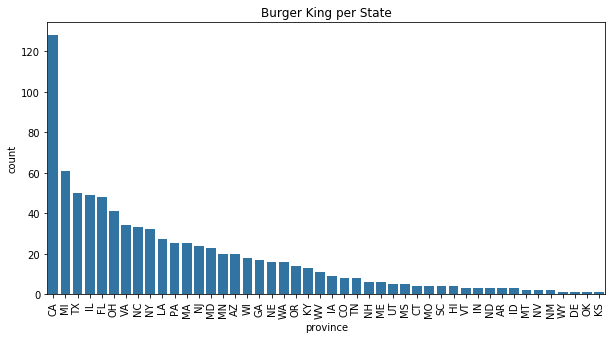

In [53]:
#State/province with the most Burger King
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
state_order = burger_king['province'].value_counts().index
sb.countplot(data = burger_king, x = 'province', color = base_color, order = state_order)
plt.xticks(rotation=90)
plt.title('Burger King per State');

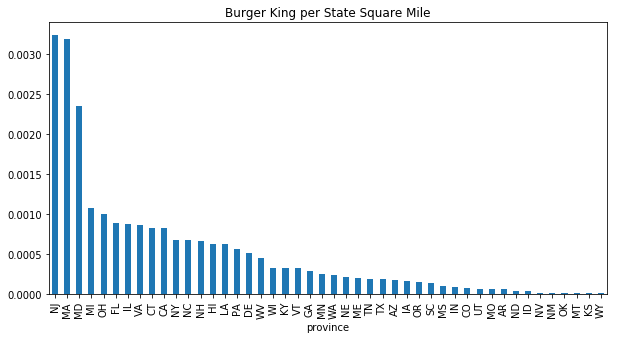

In [66]:
#Burger King per square mile area of each state
grouped_bk_area = new_bk.groupby('province')['bk_per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_bk_area.plot.bar(color = base_color)
plt.title('Burger King per State Square Mile');

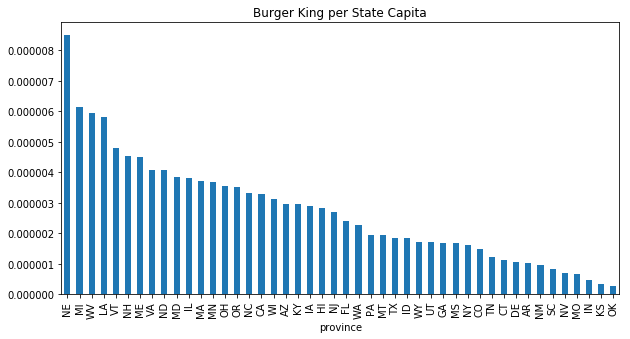

In [67]:
#Burger King per capita of each state
grouped_bk_capita = new_bk.groupby('province')['bk_per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_bk_capita.plot.bar(color = base_color)
plt.title('Burger King per State Capita');

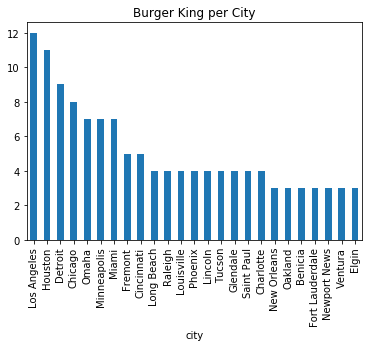

In [68]:
#City with the most Burger King
top_bk_city = burger_king.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_bk_city.plot.bar(color = base_color)
plt.title('Burger King per City');

In [69]:
#Connect to Mapbox access token
mapbox_access_token='pk.eyJ1IjoibmF2ZWVuOTIiLCJhIjoiY2pqbWlybTc2MTlmdjNwcGJ2NGt1dDFoOSJ9.z5Jt4XxKvu5voCJZBAenjQ'

In [70]:
#Create US map with Burger King locations
bg_lat = burger_king.latitude
bg_lon = burger_king.longitude
bg_city = burger_king.city

data = [
    go.Scattermapbox(
        lat=bg_lat,
        lon=bg_lon,
        mode='markers',
        marker=dict(
            size=5,
            color='rgb(0,255, 0)',
            opacity=0.8
        ))]
layout = go.Layout(
    title='Burger King Restaurants',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='Burger King Restaurants')

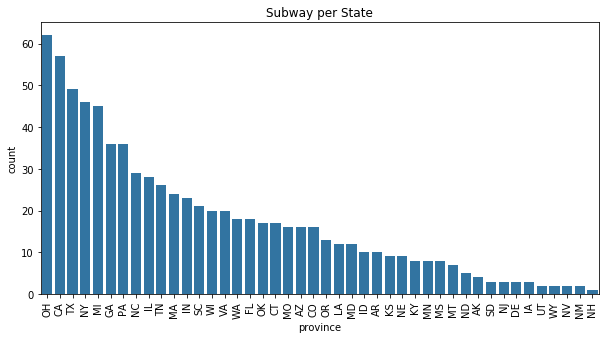

In [71]:
#State/province with the most Subway
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
state_order_sub = subway['province'].value_counts().index
sb.countplot(data = subway, x = 'province', color = base_color, order = state_order_sub)
plt.xticks(rotation=90)
plt.title('Subway per State');

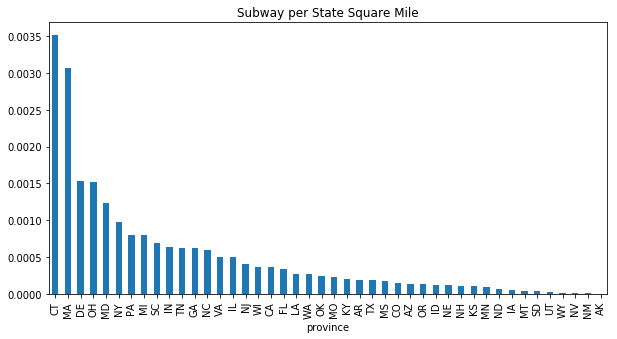

In [72]:
#Subway per square mile area of each state
grouped_subway_area = new_subway.groupby('province')['subway_per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_subway_area.plot.bar(color = base_color)
plt.title('Subway per State Square Mile');

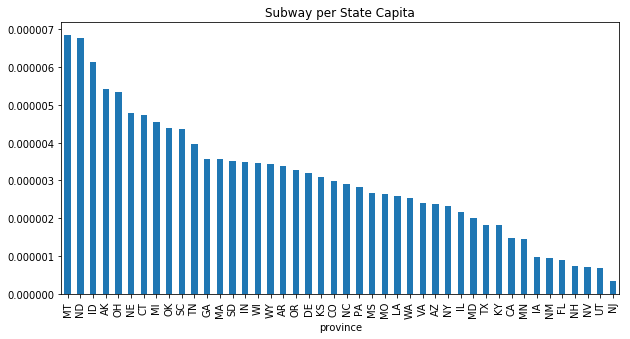

In [73]:
#Subway per capita of each state
grouped_subway_capita = new_subway.groupby('province')['subway_per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_subway_capita.plot.bar(color = base_color)
plt.title('Subway per State Capita');

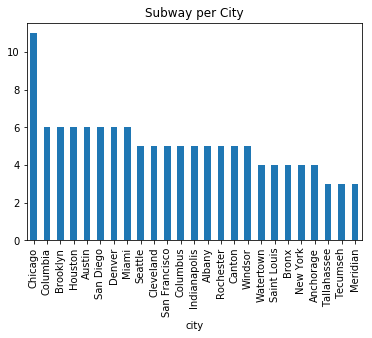

In [74]:
#City with the most Subway
top_subway_city = subway.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_subway_city.plot.bar(color = base_color)
plt.title('Subway per City');

In [75]:
#Create US map with all Subway locations
sub_lat = subway.latitude
sub_lon = subway.longitude
sub_city = subway.city

data = [
    go.Scattermapbox(
        lat=sub_lat,
        lon=sub_lon,
        mode='markers',
        marker=dict(
            size=5,
            color='rgb(0,0,255)',
            opacity=0.8
        ))]
layout = go.Layout(
    title='Subway Restaurants',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='Subway Restaurants')

<a id='conclusion'></a>
## Conclusion

### Burger King Summary:
1. In terms of numbers, Burger King is dominating in California state with double the count to the second highest state: Michigan. The city of Los Angeles, California has the highest count of Burger King restaurants among other US cities.
2. However, looking at Burger King per square mile of area, California comes in the 10th, while New Jersey and Massachusetts take the lead for the most Burger King restaurants per area of the state.
3. In terms of population, California ranks 17th while New England take the 1st rank with the most Burger King per capita.
4. Looking at the map, the East Coast is more crowded with Burger King than the West Coast, except in California. The middle part of US doesn't have too much Burger King activity.
5. Looking at all 3 aspects (count, area, and population), Michigan is the state being in the top 5 in all categories, with the city of Detroit leading the way as the 3rd highest count of Burger King among all US cities.

### Subway Summary:
1. In terms of numbers, Subway is dominating in Ohio and California states.
2. However, looking at Subway per square mile of area, Ohio and California come in the 4th and 18th, while Connecticut and Massachusetts take the lead for the most Subway restaurants per area of the state.
3. In terms of population, Ohio ranks 5th while California is on the bottom tier with Montana and North Dakota take the first and second positions in having the most Subway per capita.
4. Looking at the map, the middle to East Coast is more crowded with Subway than the West Coast.
5. Looking at all 3 aspects (count, area, and population), Ohio is the state being in the top 5 in all categories.